**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1J63iIsxX-cFs7Er_F-ibZKC37rMq-iAO?usp=sharing)

2. [Практика 1](https://colab.research.google.com/drive/1hD2iZeqMoH8oITN7AFWOGiB9CMdwuvlw?usp=sharing) 

3. Практика 2

# Кластеризация базы HeadHunter с помощью алгоритма K-Means

Теперь попробуем применить алгоритм кластеризации K-Means на базе вакансий HeadHunter. Рассмотрим два типа кластеризации - кластеризация по числовым данным и кластеризация по текстовым данным.

Импортируем необходимые библиотеки:

In [ ]:
# Импорт библиотеки для обработки и анализа данных
import pandas as pd 

# Подключение библиотеки для построения графиков
import matplotlib.pyplot as plt 

# Импорт библиотеки для работы с массивами
import numpy as np

# Импорт модуля для получения ohe-представления
from tensorflow.keras import utils 

# Импорт модулей для предобработки текстовых данных
from keras.preprocessing.text import Tokenizer, text_to_word_sequence, tokenizer_from_json 

# Импорт библиотеки для масштабирования данных
from sklearn.preprocessing import StandardScaler

# Импорт модуля для кластеризации 
from sklearn.cluster import KMeans 

# Статический вывод графики
%matplotlib inline

### Загрузка базы, просмотр содержимого

In [ ]:
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/advanced/l14/hh_fixed.csv', None, quiet=True)

'hh.csv'

In [ ]:
# Загрузка датасета

fixed_df = pd.read_csv('hh_fixed.csv')

In [ ]:
# Просмотр содержимого базы
fixed_df = fixed_df.drop('Unnamed: 0', axis=1)
fixed_df.head(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последенее/нынешнее место работы,Последеняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 29 лет , родился 16 мая 1989",40000 руб.,Специалист по поддержке чата(support team) дом...,"Новороссийск , готов к переезду (Анапа, Геленд...",полная занятость,полный день,Опыт работы 3 года 9 месяцев Специалист по по...,"ООО ""Гольфстрим""",Генеральный директор,Высшее образование 2011 Международный юридиче...,26.04.2019 08:04,Не указано
1,"Мужчина , 38 лет , родился 25 мая 1980",40000 руб.,Системный администратор,"Новосибирск , м. Березовая роща , не готов к ...",полная занятость,полный день,Опыт работы 11 лет 11 месяцев Системный админ...,ООО «Завод модульных технологий»,Системный администратор,Высшее образование 2002 Новосибирский государс...,26.04.2019 04:30,Не указано
2,"Мужчина , 35 лет , родился 14 июня 1983",300000 руб.,DevOps TeamLead / DevOps архитектор,"Москва , готов к переезду , готов к редким ком...",полная занятость,полный день,Опыт работы 12 лет 11 месяцев DevOps TeamLead...,Банк ВТБ (ПАО),Начальник отдела методологии разработки (DevOp...,DevOps TeamLead / DevOps архитектор 300 000 ру...,09.04.2019 14:40,Не указано
3,"Мужчина , 33 года , родился 2 августа 1985",180000 руб.,Руководитель IT отдела,"Москва , м. Щукинская , не готов к переезду ,...","частичная занятость, полная занятость","удаленная работа, полный день",Опыт работы 15 лет 10 месяцев Руководитель IT...,"""Ай-Теко"", ведущий российский системный интегр...",Старший системный администратор,Руководитель IT отдела 180 000 руб. Информацио...,09.04.2019 14:39,Имеется собственный автомобиль
4,"Мужчина , 22 года , родился 1 сентября 1996",40000 руб.,Junior Developer,"Москва , м. Юго-Западная , не готов к переезд...","стажировка, частичная занятость, проектная работа","гибкий график, удаленная работа",Опыт работы 1 год 1 месяц Junior Developer 40...,R-Style SoftLab,Менеджер IT-проектов,Junior Developer 40 000 руб. Информационные те...,29.03.2019 12:40,Не указано


In [ ]:
# Вывод полной информации по одной записи из базы

n = 4                                    # Номер записи в базе
for i in range(len(fixed_df.values[n])): # Перебор всех столбцов данных выбранной записи
  print(i, " ", fixed_df.values[n][i])   # Вывод содержимого очередной ячейки с данными

0   Мужчина ,  22 года , родился 1 сентября 1996
1   40000 руб.
2   Junior Developer
3   Москва ,  м. Юго-Западная , не готов к переезду , готов к редким командировкам
4   стажировка, частичная занятость, проектная работа
5   гибкий график, удаленная работа
6   Опыт работы 1 год 1 месяц  Junior Developer 40 000 руб. Информационные технологии, интернет, телеком Программирование, Разработка Занятость: стажировка, частичная занятость, проектная работа График работы: гибкий график, удаленная работа Опыт работы 1 год 1 месяц Ноябрь 2016 — Ноябрь  2017 1 год 1 месяц R-Style SoftLab www.softlab.ru Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер IT-проектов Ведение проекта по распознаванию автомобильных номеров. Ключевые навыки Теперь резюме открыто всему интернету — изменить можно в настройках видимости. Копирайтинг SMM Создание сайтов Уп

### Парсинг данных

In [ ]:
def getParameterSex(arg):

  ''' Функция получения данных о поле соискателя.

  Args:
    arg - строка данных (для данной функции передаем первую колонку из таблицы)
  
  Returns:   0 (для женского пола) или 1 (для мужского пола)

  '''

  out = 0                     # По умолчанию женский пол
  
  if(arg[0] == "М"):          # Если в arg[0] буква М, то в выход записываем 1
    out = 1
  
  return out                  # Возвращаем числовое представление пола

In [ ]:
def getParameterAge(arg):

  ''' Функция получения данных о возрасте соискателя.

  Args:
    arg - строка данных (для данной функции передаем первую колонку из таблицы)
  
  Returns:   возраст (int)

  '''

  out = 0                                             # По умолчанию в выход записываем 0
  if (len(arg) > 7):                                  # Если в строке больше 7 символов (значит имеется информация о возрасте)
    index = 0                                         # В index записываем позицию в строке, с которой начинается возраст
    
    while ((arg[index] != " ") & (index < len(arg))): # Ищем первый пробел во входной строке (далее следует возраст)
      index += 1                                      # Увеличиваем индекс    
    
    if (index != len(arg)-1):                         # Если index меньше длинны строки
      out = int(arg[index+1:index+3])                 # В out записываем возраст (2 символа после найденного пробела во входной строке)
  
  return out                                          # Возвращаем возраст

In [ ]:
def getParameterAge2(arg):

  ''' Функция получения данных о возрасте по году рождения.

  Args:
    arg - строка данных (для данной функции передаем первую колонку из таблицы)
  
  Returns:   возраст (int)

  '''

  out = 0                                             # По умолчанию в выход записываем 0
  
  if (len(arg) > 7):                                  # Если в строке больше 7 символов (значит имеется информация о возрасте)
    ageStr = arg[len(arg)-4:len(arg)]                 # Получаем последние 4 символа во входной строке (год рождения)
    out = 2021 - int(ageStr)                          # Получаем возраст   
  
  return out                                          # Возвращаем возраст

In [ ]:
def getParameterAgeVect(arg):

  ''' Функция получения данных о возрасте по году рождения.

  Args:
    arg - строка данных (для данной функции передаем первую колонку из таблицы)
  
  Returns:   ohe-представление возраста по 11 классам (list)

  '''

  out = getParameterAge2(arg) # Получаем возраст по году рождения 
  
  outClass = 0                # По умолчанию в out записываем 0

  if (out > 18):              # Если старше 19 лет, изменяем out на 1
    outClass = 1
  if (out > 23):              # Если старше 23 лет, изменяем out на 2
    outClass = 2
  if (out > 28):              # Если старше 28 лет, изменяем out на 3
    outClass = 3
  if (out > 33):              # Если старше 33 лет, изменяем out на 4
    outClass = 4
  if (out > 38):              # Если старше 38 лет, изменяем out на 5
    outClass = 5
  if (out > 43):              # Если старше 43 лет, изменяем out на 6
    outClass = 6
  if (out > 48):              # Если старше 48 лет, изменяем out на 7
    outClass = 7
  if (out > 53):              # Если старше 53 лет, изменяем out на 8
    outClass = 8 
  if (out > 58):              # Если старше 58 лет, изменяем out на 9
    outClass = 9 
  if (out > 63):              # Если старше 63 лет, изменяем out на 10
    outClass = 10  
    
  # Возвращаем OHE представление возраста по 11 классам  
  return list(utils.to_categorical(outClass, 11).astype('int')) 

In [ ]:
def getParameterSalary(arg):

  ''' Функция получения данных о возрасте по году рождения.

  Args:
    arg - строка данных (для данной функции передаем вторую колонку из таблицы)
  
  Returns: желаемая зарплата (int)

  '''

  out = -1                     # По умолчанию в out записываем -1 (если зарплата не указана)
  if (type(arg) != float):     # Проверяем, чтобы в arg не было float-данных
    index = 0                  # В index запишем позицию последнего пробела во входной строке
    
    for i in range(len(arg)):  # Пробегаем по всей строке
      
      if (arg[i]==" "):        # Если очередной символ это пробел
        index = i              # Записываем позицию пробела в index
    salaryStr = ""             # Строковое представление зарплаты
    
    for i in range(index):     # Пробегаем в цикле от 0 до index (с начала строки до последнего пробела)
      
      if (i != index-4):       # Если это не пробельный символ в зарплате (в базе зарплата хранится в формате 45 000)
        salaryStr += arg[i]    # Записываем очередной символ в salaryStr
    out = int(salaryStr)       # Преобразуем в int
  
  return out                   # Возвращаем зарплату

In [ ]:
def getParameterSity(arg):

  ''' Функция получения данных о возрасте по году рождения.

  Args:
    arg - строка данных (для данной функции передаем четвертую колонку из таблицы)
  
  Returns: ohe-представление города проживания по 4 классам

  '''

  out = [0, 0, 0, 1]                    # По умолчанию город проживания не Москва, не Санкт-Петербург и не миллионник   
  index = 0                             # В индекс запишем позицию символа первой запятой во входной строке

  while (arg[index] != ","):            # Пробегаем по всем символам входной строки, пока не встретим запятую
    index += 1                          # Увеличиваем index на 1  
  sityStr = arg[:index]                 # Записываем в sityStr город прживания    
  
  # Строка, содержащая города милионники
  millionSities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"   
  
  if (sityStr == "Москва"):             # Если город проживания Москва
    out[0] = 1                          # Записываем в 0-позицию 1
    out[3] = 0                          # Обнуляем значение out по умолчанию
  
  if (sityStr == "Санкт-Петербург"):    # Если город проживания - Санкт-Петербург
    out[1] = 1                          # Записываем в 1-позицию 1
    out[3] = 0                          # Обнуляем значение out по умолчанию
  
  if (sityStr in millionSities):        # Если город проживания один из городов милионников
    out[2] = 1                          # Записываем во 2-позицию 1
    out[3] = 0                          # Обнуляем значение out по умолчанию  
  
  return out                            # Возвращаем ohe-представление города проживания по 4 классам

In [ ]:
def getParameterEmployment(arg):

  ''' Функция получения данных о желаемых типах занятости.

  Args:
    arg - строка данных (для данной функции передаем пятую колонку из таблицы)
  
  Returns: список желаемых типов занятости

  '''

  out = [0, 0, 0, 0]                 # По умолчанию желаемый тип занятости не указан  
  
  if ("стажировка" in arg):          # Если во входной строке имеется пункт: стажировка
    out[0] = 1                       # Записываем в 0-позицию 1
  if ("частичная занятость" in arg): # Если во входной строке имеется пункт: частичная занятость
    out[1] = 1                       # Записываем в 1-позицию 1
  if ("проектная работа" in arg):    # Если во входной строке имеется пункт: проектная работа
    out[2] = 1                       # Записываем в 2-позицию 1
  if ("полная занятость" in arg):    # Если во входной строке имеется пункт: полная занятость
    out[3] = 1                       # Записываем в 3-позицию 1
  
  return out                         # Возвращаем список желаемых типов занятости

In [ ]:
def getParameterSchedule(arg):

  ''' Функция получения данных о желаемых графиках работы.

  Args:
    arg - строка данных (для данной функции передаем шестую колонку из таблицы)
  
  Returns: список желаемых типов занятости

  '''

  out = [0, 0, 0, 0]              # По умолчанию желаемый график не указан  
  
  if ("гибкий график" in arg):    # Если во входной строке имеется пункт: гибкий график
    out[0] = 1                    # Записываем в 0-позицию 1  
  if ("полный день" in arg):      # Если во входной строке имеется пункт: полный день
    out[1] = 1                    # Записываем в 1-позицию 1  
  if ("сменный график" in arg):   # Если во входной строке имеется пункт: сменный график
    out[2] = 1                    # Записываем в 2-позицию 1  
  if ("удаленная работа" in arg): # Если во входной строке имеется пункт: удаленная работа
    out[3] = 1                    # Записываем в 3-позицию 1    
  
  return out                      # Возвращаем список желаемых графиков работы

In [ ]:
def getParameterEducation(arg):

  ''' Функция получения данных об образовании.

  Args:
    arg - строка данных (для данной функции передаем девятую колонку из таблицы)
  
  Returns: список с данными об образовании

  '''
  try:
    out = [0, 0, 0, 0]                 # По умолчанию образование не указано  
    
    if ("Высшее" in arg):              # Если во входной строке имеется пункт: Высшее
      out[0] = 1                       # Записываем в 0-позицию 1  
    if ("Higher education" in arg):    # Если во входной строке имеется пункт: Higher education
      out[0] = 1                       # Записываем в 0-позицию 1  
    if ("Среднее специальное" in arg): # Если во входной строке имеется пункт: Среднее специальное
      out[1] = 1                       # Записываем в 1-позицию 1  
    if ("Неоконченное высшее" in arg): # Если во входной строке имеется пункт: Неоконченное высшее
      out[2] = 1                       # Записываем в 2-позицию 1  
    if ("Среднее образование" in arg): # Если во входной строке имеется пункт: Среднее образование
      out[3] = 1                       # Записываем в 3-позицию 1 
  except:
    out = [0, 0, 0, 1]
  return out                         # Возвращаем список с данными об образовании

In [ ]:
def getParameterExperience(arg):

  ''' Функция получения данных об опыте работы.

  Args:
    arg - строка данных (для данной функции передаем седьмую колонку из таблицы)
  
  Returns: стаж работы в месяцах (int)

  '''
  try:
    numberStr = ['1','2','3','4','5','6','7','8','9','0']     # Массив цифр в строковом представлении
    out = 0                                                   # По умолчанию без опыта работы  
    symbols = 0                                               # В symbols будет храниться количество не пробельных символов

    for s in arg:                                             # Пробегаем по всей входной строке
      if (s != " "):                                          # Если очередной символ не пробел
        symbols += 1                                          # Увеличиваем symbols на 1   

    if (symbols > 10):                                        # Если имеются еще какие-то данные, помимо строки: опыт работы
      spacesIndexes = []                                      # Список, в который запишем первые 5 пробелов во входной строке
      index = 0                                               # Счетчик символов 

      while ((len(spacesIndexes) < 5) & (index < len(arg))):  # Пробегаем по циклу, пока не найдем 5 пробелов или пока не достигнем конца входной строки
        
        if (arg[index] == " "):                               # Если очередной символ пробел
          spacesIndexes.append(index)                         # Запишем индекс пробела в spacesIndexes
        index += 1                                            # Увеличиваем счетчик    
      
      years = 0                                               # Количество отработанных лет
      months = 0                                              # Количество отработанных месяцев

      # Если отработал больше 1 года (есть данные о годах)
      if (arg[spacesIndexes[2]+1] != "м" and arg[spacesIndexes[2]+1] != "m"): 
        
        if (len(spacesIndexes) >= 3):                         # Если найдено больше 2 пробелов (значит есть данные о годах)
          yearsStr = arg[spacesIndexes[1]+1:spacesIndexes[2]] # Получаем символы между вторым и третьим пробелом из spacesIndexes
          yaerIsNumber = True                                 # Флаг того, что количество лет представлено числом
          
          for s in yearsStr:                                  # Пробегаем по всем символам года
            yaerIsNumber = yaerIsNumber and (s in numberStr)  # Перезаписываем yaerIsNumber в зависимости от s in numberStr 
          if yaerIsNumber:                                    # Если количество лет представлено числом
            years = int(yearsStr)                             # Получаем числовое представление

        if (len(spacesIndexes) >= 5):                         # Если найдено больше 4 пробелов (значит могут быть данные о месяцах)
        # Получаем символы между двумя последними пробелами из spacesIndexes
          monthsStr = arg[spacesIndexes[3]+1:spacesIndexes[4]] 
          monthIsNumber = True                                # Флаг того, что количество месяцев представлено числом
          
          for s in monthsStr:                                 # Пробегаем по всем символам мнсяцев
            # Перезаписываем yaerIsNumber в зависимости от s in numberStr
            monthIsNumber = monthIsNumber and (s in numberStr)  
          if monthIsNumber:
            months = int(monthsStr)                           # Получаем числовое представление
      
      else:                                                   # Если отработал меньше одного года
        
        if (len(spacesIndexes) >= 3):                         # Если найдено больше 2 пробелов (значит есть данные о месяцах)
          # Получаем символы между вторым и третьим пробелом из spacesIndexes
          monthsStr = arg[spacesIndexes[1]+1:spacesIndexes[2]] 
          months = int(monthsStr)                             # Получаем числовое представление
          
      out = 12*years + months                                 # Считаем общий стаж в месяцах  
  except:
    out = 1
  return out                                                # Возвращаем стаж работы в месяцах

In [ ]:
def getParameterExperienceVector(arg):

  ''' Функция получения данных об опыте работы.

  Args:
    arg - строка данных (для данной функции передаем седьмую колонку из таблицы)
  
  Returns: ohe-представление опыта работы по 11 классам (list)

  '''

  out = getParameterExperience(arg)         # Получаем данные об опыте работы
  outClass = 0                              # По умолчанию в out записываем 0

  if (out > 6):                             # Если опыт работы составляет более 6 месяцев, изменяем out на 1
    outClass = 1
  if (out > 12):                            # Если опыт работы составляет более 12 месяцев, изменяем out на 2
    outClass = 2 
  if (out > 24):                            # Если опыт работы составляет более 24 месяцев, изменяем out на 3
    outClass = 3
  if (out > 36):                            # Если опыт работы составляет более 36 месяцев, изменяем out на 4
    outClass = 4
  if (out > 60):                            # Если опыт работы составляет более 60 месяцев, изменяем out на 5
    outClass = 5
  if (out > 96):                            # Если опыт работы составляет более 96 месяцев, изменяем out на 6
    outClass = 6
  if (out > 120):                           # Если опыт работы составляет более 120 месяцев, изменяем out на 7
    outClass = 7
  if (out > 156):                           # Если опыт работы составляет более 156 месяцев, изменяем out на 8
    outClass = 8
  if (out > 192):                           # Если опыт работы составляет более 192 месяцев, изменяем out на 9
    outClass = 9 
  if (out > 240):                           # Если опыт работы составляет более 240 месяцев, изменяем out на 10
    outClass = 10 
  
  return list(utils.to_categorical(outClass, 11).astype('int')) 

In [ ]:
def getAllParameters(val):

  ''' Функция получения полного набора данных по одной записе из базы.

  Args:
    val - запись из базы
  
  Returns: массив числовых данных, соответствующий исходной записи

  '''

  sex = getParameterSex(val[0])               # Получаем пол
  age = getParameterAge2(val[0])              # Получаем возраст
  salary = getParameterSalary(val[1])         # Получаем желаемый уровень зарплаты
  sity = getParameterSity(val[3])             # Получаем город проживания
  employment = getParameterEmployment(val[4]) # Получаем информацию о желаемой занятости
  shedule = getParameterSchedule(val[5])      # Получаем информацию о желаемом графике работы
  education = getParameterEducation(val[8])   # Получаем информацию об образовании
  experience = getParameterExperience(val[6]) # Получаем информацию об опыте работы
  out = []                                    # Создаем пустой список
  out.append(sex)                             # Добавляем данные о поле
  out.append(age)                             # Добавляем данные о возрасте
  out += sity                                 # Добавляем данные о городе проживания
  out += employment                           # Добавляем данные о желаемой занятости
  out += shedule                              # Добавляем данные о желаемом графике работы
  out += education                            # Добавляем данные об образовании
  out.append(experience)                      # Добавляем данные об опыте работы
  out.append(salary)                          # Добавляем данные о желаемом уровне зарплаты  
  return out                                  # Возвращаем сформированный список

In [ ]:
def get01Data(values):

  ''' Функция получения обучающей выборки.

  Args:
    values - данные из базы
  
  Returns: xTrain, yTrain, соотв. данным обучающей выборки

  '''

  xTrain = []                       # Создаем пустой xTrain
  yTrain = []                       # Создаем пустой yTrain
  
  for val in values:                # Пробегаем по всем записям базы
    y = getParameterSalary(val[1])  # Получаем желаемый уровень зарплаты
    if (y != -1):                   # Если есть информация о желаемом уровне (отсеиваем все резюме, где не указана ЗП)
      x = getAllParameters(val)     # Получаем полный набор данных о текущей записи val
      xTrain.append(x)              # Добавляем полученные данные в xTrain
      yTrain.append(y/1000)         # Добавялем в yTrain желаемую зарплату (в тыс)
  
  xTrain = np.array(xTrain)         # Переводим в numpy
  yTrain = np.array(yTrain)         # Переводим в numpy
  
  return (xTrain, yTrain)           # Возращаем набор данных

### Простые данные

Получаем набор данных о каждом соискателе с помощью функций парсинга:

In [ ]:
# Создание обучающей выборки по данным из базы

(xTrain01, yTrain) = get01Data(fixed_df.values) 

In [ ]:
# Вывод размерности xTrain01
print(xTrain01.shape) 

# Вывод размерности yTrain
print(yTrain.shape)   

(62967, 20)
(62967,)


In [ ]:
# Просмотр данных для конкретной записи

n = 4                       # Номер записи
print(xTrain01[n])          # Вывод xTrain01[n]
print(yTrain[n])            # Вывод yTrain[n]

[   1   24    0    0    0    1    1    1    1    0    1    0    0    1
    0    0    0    0   13 4000]
4.0


Получили вектор данных для одного соискателя. Как видим, последняя цифра зарплаты намного больше всех остальных, поэтому при кластеризации таких данных, с большой вероятностью, кластеры будут строиться только на основе данных по зарплате, т.е. в одних классах будут большие зарплаты, в других средние и т.д. Чтобы избежать этого, данные необходимо нормировать.

In [ ]:
# Создание объекта StandardScaler для стандартного распределения
data01Scaler = StandardScaler()          

# Создание обучающего набора данных xTrain01Scaled со стандартным распределением на основе xTrain01
xTrain01Scaled = data01Scaler.fit_transform(xTrain01) 

# Вывод сформированных данных для конкретной записи
n = 4                               # Номер записи 
print(xTrain01Scaled[n])            # Вывод данных

[ 0.48230371 -1.21815273  0.          0.         -0.42995316  0.42995316
  3.88428039  1.55184643  2.13208791 -5.27426288  1.37144521 -3.61536139
 -0.62526144  1.40187234  0.          0.          0.         -0.00797053
 -1.10356037 -0.36415366]


### Простые текстовые данные

Формируем текстовые данные, содержащие выборку должности, на которую соискатель претендует, и текущей должности.

In [ ]:
def getXTrainTProf(values):

  ''' Функция получения данных о профессии.

  Args:
    values - запись из базы
  
  Returns:   массив текстовых данных о профессиях, содержащих зарплаты

  '''

  xTrainTProf = []                          # Создаем пустой список
  
  for val in values:                        # Проходим по всем данным в записи
    currText = ""                           # Создаем пустой текст
    if (type(val[3]) != float):             # Если тип значения val[3] не float
      currText += val[2]                    # Добавляем в текст val[2] 
    if (type(val[7]) != float):             # Если тип значения val[7] не float
      currText += " " + val[7]              # Добавляем в текст val[7]
    
    if (getParameterSalary(val[1]) != -1):  # Проверяем, если есть данные о зарплате
      xTrainTProf.append(currText)          # Добавляем в список данные о профессии
  
  xTrainTProf = np.array(xTrainTProf)       # Преобразуем в numpy-массив
  
  return xTrainTProf                        # Возвращаем массив профессий

In [ ]:
# Загрузка профессий для выборки
xTrainTProf = getXTrainTProf(fixed_df.values) 

In [ ]:
# Пример профессии 11-го резюме
print(xTrainTProf[11]) 

Системный инженер Управление Федеральной службы по надзору в сфере защиты прав потребителей и благополучия человека по городу Москве


K-Means также работает с числовыми данными, поэтому используем *Tokenizer* для создания словаря частотности слов и получения индексов слов. В выборку будем передавать Bag of Words представление наших векторов.

In [ ]:
# Определение макс. кол-ва слов/индексов, учитываемых при обучении текстов
maxWordsCount = 10000 

# Использование встроенного в Keras токенизатора для разбиения текста и построения частотного словаря

tokenizer = Tokenizer(num_words=maxWordsCount,                              # num_words   - объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # filters     - убираемые из текста ненужные символы
                      lower=True,                                           # lower       - приведение слов к нижнему регистру
                      split=' ',                                            # split       - разделитель слов
                      oov_token='unknown',                                  # oov_token   - токен для слов, которые не вошли в словарь
                      char_level=False)                                     # char_level  - указание разделять по словам, а не по единичным символам

# Построение частотного словаря по текстам
tokenizer.fit_on_texts(xTrainTProf)     

# Извлечение индексов слов для просмотра
items = list(tokenizer.word_index.items())

In [ ]:
# Создание словаря
vocabularyItems = tokenizer.word_index      

# Вывод первых 50-и значений
print( 'Фрагмент словаря : {}'.format(list(tokenizer.word_index.items())[:50]))

Фрагмент словаря : [('unknown', 28510), ('ооо', 2), ('инженер', 3), ('специалист', 4), ('по', 5), ('администратор', 6), ('менеджер', 7), ('системный', 8), ('руководитель', 9), ('программист', 10), ('it', 11), ('отдела', 12), ('проектов', 13), ('разработчик', 14), ('ао', 15), ('аналитик', 16), ('проекта', 17), ('поддержки', 18), ('и', 19), ('ит', 20), ('технической', 21), ('интернет', 22), ('ведущий', 23), ('оао', 24), ('пао', 25), ('оператор', 26), ('фриланс', 27), ('с', 28), ('центр', 29), ('технический', 30), ('компания', 31), ('частная', 32), ('начальник', 33), ('практика', 34), ('в', 35), ('зао', 36), ('банк', 37), ('индивидуальное', 38), ('предпринимательство', 39), ('директор', 40), ('продажам', 41), ('монтажник', 42), ('developer', 43), ('web', 44), ('связи', 45), ('систем', 46), ('1с', 47), ('junior', 48), ('manager', 49), ('ип', 50)]


In [ ]:
# Преобразование текста в последовательность индексов согласно частотному словарю
# Обучающие тексты в индексы
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainTProf) 

### Подготовка выборок

Создаем вектора для кластеризации. Преобразование полученных выборок из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words:

In [ ]:
# Подаем xTrain в виде списка, чтобы метод успешно сработал
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) 

# Вывод размера обучающей выборки, сформированной по Bag of Words
print(xTrainProf01.shape)      

# Фрагмент набора слов в виде Bag of Words
print(xTrainProf01[0][0:100])                                   

(62967, 10000)
[0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### Кластеризация числовых данных

Напишем функцию, которая выводит информацию о кластере. Сейчас работаем только с числовыми данными.

In [ ]:
def printCluster(x):

  ''' Функция печати информации о кластере.

  Args:
    x - набор данных
  
  Returns:  

  '''

  # Выводим количество элементов в кластере
  print("Размер кластера:", x.shape[0]) 
  
  mX = np.mean(x, axis=0)           # Считаем среднее значение по кластеру
  minX = np.min(x, axis=0)          # Находим минимальное значение в кластере
  maxX = np.max(x, axis=0)          # Находим максимальное значение в кластере
  stdX = np.std(x, axis=0)          # Находим стандартное отклонение элементов кластера

  # Отображаем полученную информацию по указанному кластеру
  print("Пол: ", round(100*mX[0]), "% мужчины", sep="") 
  print("Возраст: ", round(mX[1]), ", разброс: ", round(stdX[1],1), sep="")
  print("Опыт работы: ", round(mX[18]/12,1), ", разброс: ", round(stdX[18]/12,1), sep="")
  print("Зарплата: ", round(mX[19]), ", разброс: ", round(stdX[19],0), sep="")
  
  print("\nТерриториально")
  print("Москва: ", round(100*mX[2]), "%", sep="")
  print("Санкт-Петербург: ", round(100*mX[3]), "%", sep="")
  print("Города миллионники: ", round(100*mX[4]), "%", sep="")
  print("Другие города: ", round(100*mX[5]), "%", sep="")
  
  print("\nТип занятости")
  print("Стажировка: ",  round(100*mX[6]), "%", sep="")
  print("Частичная занятость: ",  round(100*mX[7]), "%", sep="")
  print("Проектная работа: ",  round(100*mX[8]), "%", sep="")
  print("Полная занятость: ",  round(100*mX[9]), "%", sep="")
  
  print("\nГрафик")
  print("Гибкий график: ",  round(100*mX[10]), "%", sep="")
  print("Полный день: ",  round(100*mX[11]), "%", sep="")
  print("Сменный график: ",  round(100*mX[12]), "%", sep="")
  print("Удаленная работа: ",  round(100*mX[13]), "%", sep="")
  
  print("\nОбразование")
  print("Высшее: ",  round(100*mX[14]), "%", sep="")
  print("Среднее специальное: ",  round(100*mX[15]), "%", sep="")
  print("Неоконченное высшее: ",  round(100*mX[16]), "%", sep="")
  print("Среднее образование: ",  round(100*mX[17]), "%", sep="")

Посмотрим работу функции. Пока это не кластеризация, а просто информация по нашей базе.

In [ ]:
 # Вывод информации об xTrain01
printCluster(xTrain01) 

Размер кластера: 62967
Пол: 81% мужчины
Возраст: 34, разброс: 8.1
Опыт работы: 8.7, разброс: 6.9
Зарплата: 7788, разброс: 10401.0

Территориально
Москва: 0%
Санкт-Петербург: 0%
Города миллионники: 16%
Другие города: 84%

Тип занятости
Стажировка: 6%
Частичная занятость: 29%
Проектная работа: 18%
Полная занятость: 97%

График
Гибкий график: 35%
Полный день: 93%
Сменный график: 28%
Удаленная работа: 34%

Образование
Высшее: 0%
Среднее специальное: 0%
Неоконченное высшее: 0%
Среднее образование: 0%


Теперь перейдем к кластеризации. Давайте возьмем нормированные данные и произвольное число кластеров - 10.

In [ ]:
# Задание количества кластеров
clustersCount = 10  

# Создание объекта KMeans с указанным количеством кластеров
kmean = KMeans(clustersCount) 

# Кластеризация данных xTrain01Scaled
kmean.fit(xTrain01Scaled) 

# Получение меток кластеров
labels = kmean.labels_        

Теперь каждому резюме из нашей базы поставлена в соответствие метка соответствующего кластера.

In [ ]:
# Вывод первых 20 меток
print(labels[:20]) 

[6 0 2 5 3 6 2 1 4 6 2 2 2 5 6 1 1 6 5 3]


Посмотрим, что хранится в одном из кластеров.

In [ ]:
# Номер кластера
clusterNumber = 6  

# Вывод информации о кластере с указанным номером
printCluster(xTrain01[labels==clusterNumber,:]) 

# Вывод всех профессий, попавших в этот кластер
print('\n\nПрофессии:', xTrainTProf[labels==clusterNumber])

Размер кластера: 18703
Пол: 100% мужчины
Возраст: 31, разброс: 4.8
Опыт работы: 6.1, разброс: 4.1
Зарплата: 7695, разброс: 6477.0

Территориально
Москва: 0%
Санкт-Петербург: 0%
Города миллионники: 0%
Другие города: 100%

Тип занятости
Стажировка: 0%
Частичная занятость: 1%
Проектная работа: 1%
Полная занятость: 100%

График
Гибкий график: 3%
Полный день: 98%
Сменный график: 7%
Удаленная работа: 6%

Образование
Высшее: 0%
Среднее специальное: 0%
Неоконченное высшее: 0%
Среднее образование: 0%


Профессии: ['Специалист по поддержке чата(support team) домашний агент ООО "Гольфстрим"'
 'Разработчик C#, Team Lead ООО "КСК"'
 'Специалист технической поддержки СОФТВОРКС ЛАБ, ООО' ...
 'Специалист технической поддержки гк эволад'
 'менеджер проекта ОАО "Киностудия "Ленфильм"'
 'Специалист по информационной безопасности АО "Восточное оборонное предприятие "Гранит"']


По описанию данного кластера очень сложно понять, по каким параметрам алгоритм отнес данные именно к этому кластеру. Можно предположить, что основополагающими были данные по образованию - 97%. Посмотрим ещё один кластер.

In [ ]:
# Номер кластера
clusterNumber = 0  

# Вывод информации о кластере с указанным номером
printCluster(xTrain01[labels==clusterNumber,:]) 

# Вывод всех профессий, попавших в этот кластер
print('\n\nПрофессии:', xTrainTProf[labels==clusterNumber])

Размер кластера: 8402
Пол: 78% мужчины
Возраст: 33, разброс: 7.5
Опыт работы: 8.1, разброс: 6.4
Зарплата: 4888, разброс: 3453.0

Территориально
Москва: 0%
Санкт-Петербург: 0%
Города миллионники: 100%
Другие города: 0%

Тип занятости
Стажировка: 1%
Частичная занятость: 18%
Проектная работа: 7%
Полная занятость: 100%

График
Гибкий график: 25%
Полный день: 97%
Сменный график: 22%
Удаленная работа: 24%

Образование
Высшее: 0%
Среднее специальное: 0%
Неоконченное высшее: 0%
Среднее образование: 0%


Профессии: ['Системный администратор ООО «Завод модульных технологий»'
 'Руководитель проекта Дума городского округа Краснотурьинск'
 'PHP-программист ООО "Цифровые Экосистемы"' ...
 'Инженер Этажи, федеральная компания' 'Руководитель проектов Гурман, ООО'
 'Монтажник слаботочных систем смт-интех']


По данным этого кластера видно, что сюда алгоритм отнес все резюме с полной занятостью. Так можно просмотреть основные характеристики, по которым алгоритм произвел деление на кластеры.

Для того, чтобы определить оптимальное количество кластеров для нашей базы, мы простым перебором пробегаем по значениям от 0 до 30 (например) и делим нашу выборку поочередно на 1, 2, 3 и т.д. кластеров. У объекта **kmean** есть параметр **.inertia_** - среднее расстояние до центра кластера. Нам необходимо для каждого количества кластеров посчитать среднее значение расстояния до центра кластера и отобразить его на графике. 

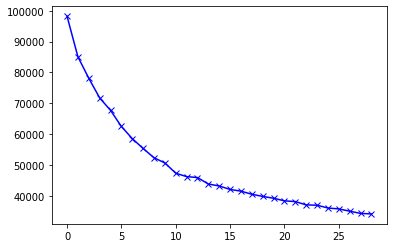

In [ ]:
n_clusters = 30                     # Задание количества кластеров
cost = []                           # Создание пустого списка
for i in range(1,n_clusters):       # Проход по списку от 1 до n_clusters
  kmean = KMeans(i)                 # Создагние объекта KMeans с i-классами
  kmean.fit(xTrain01Scaled)         # Класетризация xTrain01Scaled
  cost.append(kmean.inertia_)       # Добавление в cost элемента kmean.inertia_
 
# Значение списка cost на графике
plt.plot(cost, 'bx-')
plt.show()

Проанализируем этот график и попробуем подобрать оптимальное количество кластеров. Для этого от каждой точки проведем прямую от каждой точки к последующей до тех пор, пока есть отклонения. 




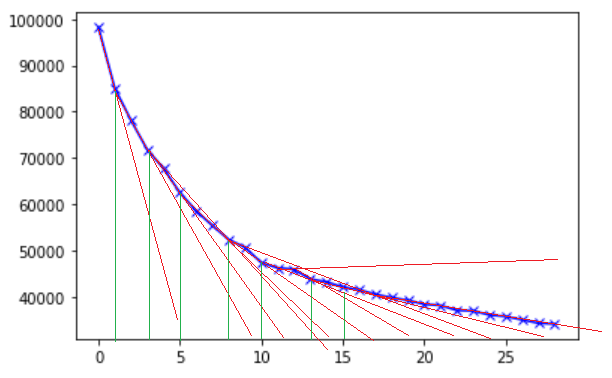

Получаем значения 1, 3, 5, 8, 10 и т.д. кластеров. Кластеризация на другое количество приведет к не совсем корректному разделению данных.

Можно проанализировать кластер с помощью гистограмм или точечных диаграмм. 

Выведем статистику по нулевому кластеру.

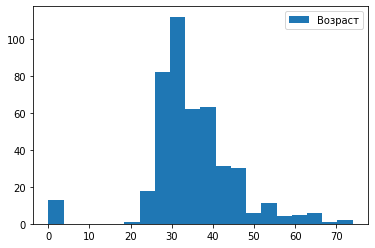

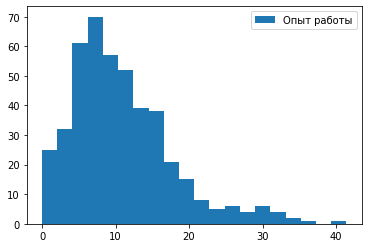

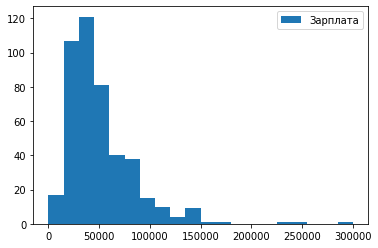

In [ ]:
clusterNumber = 0                           # Зададим номер кластера
cluster = xTrain01[labels==clusterNumber,:] # Получим из xTrain01 данные для указанного кластера
ages = cluster[:,1]                         # Получим все возраста в указанном кластере
exp = cluster[:,18] / 12                    # Получим все данные об опыте работы в указанном кластере
salary = cluster[:,19]                      # Получим все данные о желаемой зарплате в указанном кластере

# Отобразим полученные данные на графиках
plt.hist(ages,20, label="Возраст")          # Гистограмма возрастов
plt.legend()
plt.show()
plt.hist(exp,20, label="Опыт работы")       # Гистограмма опыта работы
plt.legend()
plt.show()
plt.hist(salary,20, label="Зарплата")       # Гистограмма зарплаты
plt.legend()
plt.show()

Видим, что в данный кластер попали соискатели примерно от 30-и до 40-а лет, с опытом работы от 0 до 20-и лет, с зарплатой от 0 до 120 тыс.

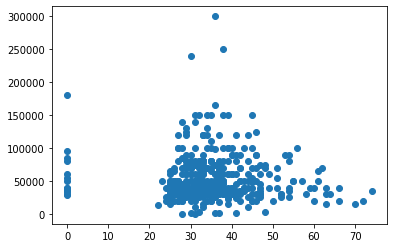

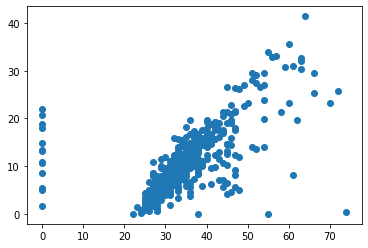

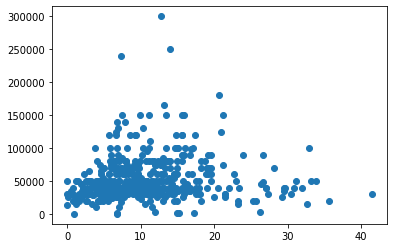

In [ ]:
# График зависимости возраста от зарплаты
plt.scatter(ages, salary)
plt.show()

# График зависимости возраста от опыта
plt.scatter(ages, exp)
plt.show()

# График зависимости опыта от зарплаты
plt.scatter(exp, salary)
plt.show()

Таким образом, с помощью кластеризации мы получили основные закономерности распределения числовых данных. 

Теперь перейдем к кластеризации текстовых данных.

### Кластеризация текстовых данных

Для текстовых данных проведем те же действия, но возьмем болшее количество кластеров и поменяем формат вывода информации о кластерах.

In [ ]:
 # Задание количества кластеров
clustersCount = 100   

# Создание объекта KMeans на clustersCount-классов
kmean = KMeans(clustersCount) 

# Кластеризация xTrainProf01
kmean.fit(xTrainProf01)   

# Список меток
labelsProf = kmean.labels_    

In [ ]:
def printProfCluster(x, bias, vocabulary):

  ''' Функция определения ключевых слов в кластере.

  Args:
    x - профессии, содержащиеся в кластере
    bias - порог для отображения только тех профессий, которые встречаются большее количество раз
    vocabulary - словарь
  
  Returns:  все найденные профессии

  '''

  mask = np.mean(x, axis=0) > bias                  # Создаем маску для набора x, средние значения которого больше bias
  mX = np.mean(x, axis=0)*100                       # Получаем среднее значение для набора данных x
  words = ""                                        # Создаем пустую строку
  
  for w in vocabulary:                              # Проходим по всем элементам словаря
    index = vocabulary[w]                           # Считываем значение очередного элемента
    if (index < mask.shape[0]):                     # Если значение меньше размерности списка-маски
      if (mask[index]):                             # Если в массиве-маске есть само значение
        val = round(mX[index])                      # Получаем значение в процентах
        words += w + " " + str(val) + "%" + "\n"    # Формируем строку вывода
  
  print(words)                                      # Выводим все найденные слова

In [ ]:
# Номер кластера
clusterNumber = 1    

# Вывод размера кластера
print("Размер кластера", sum(labelsProf==clusterNumber))    

# Получение информации по ключевым словам кластера
printProfCluster(xTrainProf01[labelsProf==clusterNumber,:], 0.5, vocabularyItems) 

# Получение записи об указанном кластере
profs = xTrainTProf[labelsProf==clusterNumber]        

# Вывод всей текстовой информации в данном кластере
for p in profs:                                                                   
  print(p)

Размер кластера 38
инженер 100%
руководитель 100%

Руководитель проекта, инженер ПТО Главный инженер
Инженер АСУ Ведущий инженер группы информационных технологий и средств связи (Руководитель группы)
Менеджер, Руководитель Начальник бюро сервиса командировок (подразделение Технопарк), инженер
Руководитель группы/отдела Старший инженер
Руководитель проекта, Ведущий инженер АСУ Начальник отдела АСУ
Руководитель проекта Главный инженер проекта
Руководитель подразделения / Старший сетевой инженер (Cisco/Juniper) / UNIX administrator Senior php developer
Главный специалист, инженер отдела строительства и эксплуатации слаботочных сетей связи Руководитель строительства и эксплуатации слаботочных сетей связи
Руководитель проекта старший шеф-инженер
Руководитель проектов, главный инженер Начальник отдела строительного контроля
руководитель группы ведущий инженер группы контроля и управления фиксированной телефонии
Руководитель проекта, инженер-строитель (ПГС),инженер СК Руководитель группы упра

Видим, что в первый кластер попали профессии, содержащие в себе слова "инженер " и "руководитель".

Выведем статистику по всем кластерам.

In [ ]:
# Проход в цикле от 0 до 100 кластеров
for clusterNumber in range(100):  
  # Вывод размера очередного кластера                                                  
  print("Размер кластера", sum(labelsProf==clusterNumber))      
  # Получение информации по ключевым словам очередного кластера                    
  printProfCluster(xTrainProf01[labelsProf==clusterNumber,:], 0.5, vocabularyItems) 
  ## Пропуск строки для разделения информации о кластерах
  print()

Размер кластера 4
и 100%
монтажник 100%
систем 100%
вентиляции 100%
кондиционирования 100%


Размер кластера 38
инженер 100%
руководитель 100%


Размер кластера 2
администратор 100%
cистемный 100%


Размер кластера 36
по 83%
директор 86%


Размер кластера 49
интернет 94%
маркетолог 100%


Размер кластера 16
программист 62%
с 56%
c 62%


Размер кластера 24
специалист 100%
аналитик 100%


Размер кластера 31
разработчик 84%
frontend 100%


Размер кластера 52
manager 100%


Размер кластера 12
по 100%
менеджер 100%
интернет 100%
с 100%
работе 100%
клиентами 92%
магазина 92%


Размер кластера 79
инженер 100%
поддержки 100%
технической 99%


Размер кластера 68
менеджер 88%
интернет 100%
магазина 100%


Размер кластера 90
разработчик 100%


Размер кластера 109
руководитель 100%
проектов 76%


Размер кластера 42
разработчик 74%
web 100%


Размер кластера 47
специалист 100%
отдела 98%
ведущий 53%


Размер кластера 153
специалист 93%
поддержки 99%
технической 90%


Размер кластера 66
по 100%
мене

По результатам видим, что сформированы достаточно большие кластеры таких профессий, как "руководитель проектов", "специалист технической поддержки", "оператор", "менеджер по работе с клиентами", "системный администратор" и др.

**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1J63iIsxX-cFs7Er_F-ibZKC37rMq-iAO?usp=sharing)

2. [Практика 1](https://colab.research.google.com/drive/1hD2iZeqMoH8oITN7AFWOGiB9CMdwuvlw?usp=sharing) 

3. Практика 2